## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Summary statistics

In [100]:
# Mouse_study dataframe grouped by "Drug Regiment" and "Timepoint"
ms_grouped=mouse_study.groupby(by=["Drug Regimen"])

### Finding the mean of Mouse_study dataframe grouped by "Drug Regiment"

In [111]:
#Finding the average of Mouse_study dataframe grouped by "Drug Regiment".
ms_avg=pd.DataFrame(ms_grouped.mean()['Tumor Volume (mm3)'])
ms_avg.rename({'Tumor Volume (mm3)': 'Tumor Volume: Mean (mm3)'}, axis=1,inplace=True)
ms_avg

,Tumor Volume: Mean (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [112]:
#Finding the median of Mouse_study dataframe grouped by "Drug Regiment".
ms_median=pd.DataFrame(ms_grouped.median()["Tumor Volume (mm3)"])
ms_median.rename({'Tumor Volume (mm3)': 'Tumor Volume: Median (mm3)'}, axis=1,inplace=True)
ms_median

,Tumor Volume: Median (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [113]:
#Finding the variance of Mouse_study dataframe grouped by "Drug Regiment".
ms_variance=pd.DataFrame(ms_grouped.var()["Tumor Volume (mm3)"])
ms_variance.rename({'Tumor Volume (mm3)': 'Tumor Volume: Variance (mm3)'}, axis=1,inplace=True)
ms_variance

,Tumor Volume: Variance (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [115]:
#Finding the Standard Deviation of Mouse_study dataframe grouped by "Drug Regiment".
ms_std=pd.DataFrame(ms_grouped.std()["Tumor Volume (mm3)"])
ms_std.rename({'Tumor Volume (mm3)': 'Tumor Volume: Standard Deviation (mm3)'}, axis=1,inplace=True)
ms_std

,Tumor Volume: Standard Deviation (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [116]:
# Find Standard Error of the Mean of Mouse_study dataframe grouped by "Drug Regiment".
ms_sem=pd.DataFrame(ms_grouped.sem()["Tumor Volume (mm3)"])
ms_sem.rename({'Tumor Volume (mm3)': 'Tumor Volume: SEM (mm3)'}, axis=1,inplace=True)
ms_sem

,Tumor Volume: SEM (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [319]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
x=pd.merge(ms_avg, ms_median, left_index=True, right_index=True)
xy=x.merge(ms_variance,left_index=True, right_index=True)
xyz=xy.merge(ms_std,left_index=True, right_index=True)
mousestudy_summary=xyz.merge(ms_sem,left_index=True, right_index=True)
mousestudy_summary

,Tumor Volume: Mean (mm3),Tumor Volume: Median (mm3),Tumor Volume: Variance (mm3),Tumor Volume: Standard Deviation (mm3),Tumor Volume: SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [327]:
ms_grouped.agg({"Tumor Volume (mm3)":[np.mean,np.median,np.var,np.std,sem,]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [12]:
mousestudy_summary.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [13]:
mousestudy_summary.columns

Index(['Tumor Volume: Mean (mm3)', 'Tumor Volume: Median (mm3)',
       'Tumor Volume: Variance (mm3)',
       'Tumor Volume: Standard Deviation (mm3)', 'Tumor Volume: SEM (mm3)'],
      dtype='object')

In [14]:
x_axis=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
        'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

## Bar plots

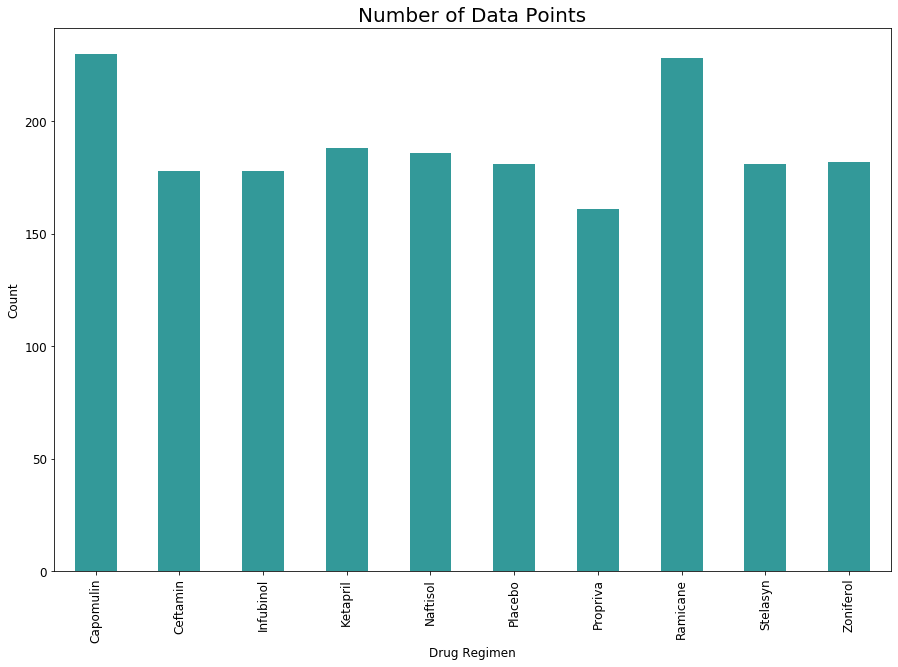

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
ax =ms_grouped["Tumor Volume (mm3)"].count().plot(kind='bar', figsize=(15, 10), fontsize=12,color="teal",alpha=0.8)
ax.set_title("Number of Data Points",fontsize=20)
ax.set_xlabel("Drug Regimen", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

Text(0, 0.5, 'Count')

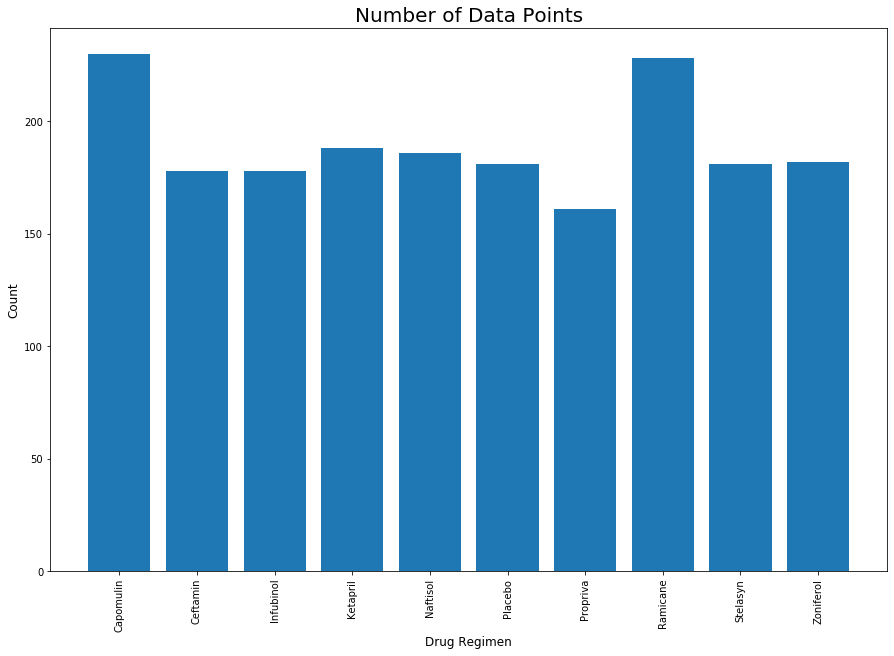

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(15,10))
plt.bar(x_axis,ms_grouped["Tumor Volume (mm3)"].count())
plt.xticks(rotation=90)
plt.title("Number of Data Points",fontsize=20)
plt.xlabel("Drug Regimen",fontsize=12)
plt.ylabel("Count",fontsize=12)

## Pie plots

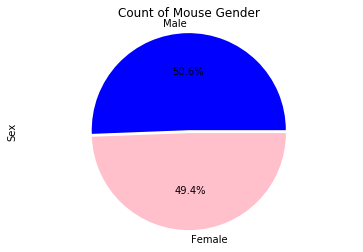

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender=mouse_study["Sex"].value_counts()
mouse_gender.plot(kind="pie",colors=["blue","pink"],explode=(0,0.03),autopct="%1.1f%%")
plt.title("Count of Mouse Gender")
plt.axis("equal")
plt.show()

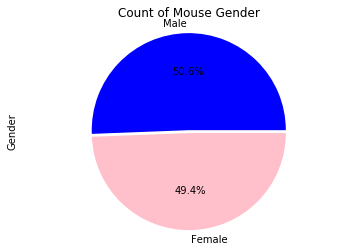

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender,labels=["Male","Female"],colors=["blue","pink"],explode=(0,0.03),autopct="%1.1f%%")
plt.title("Count of Mouse Gender")
plt.axis("equal")
plt.ylabel("Gender")
plt.show()

## Quartiles, outliers and boxplots

In [19]:
ms_grouped.agg({"Tumor Volume (mm3)":[min,max,np.mean]})

Tumor Volume (mm3)                      
                            min        max       mean
Drug Regimen                                         
Capomulin             23.343598  48.158209  40.675741
Ceftamin              45.000000  68.923185  52.591172
Infubinol             36.321346  72.226731  52.884795
Ketapril              45.000000  78.567014  55.235638
Naftisol              45.000000  76.668817  54.331565
Placebo               45.000000  73.212939  54.033581
Propriva              45.000000  72.455421  52.322552
Ramicane              22.050126  47.622816  40.216745
Stelasyn              45.000000  75.123690  54.233149
Zoniferol             45.000000  73.324432  53.236507

In [287]:
mdfg=mouse_study.groupby("Mouse ID").max()

mdfg=mdfg.reset_index()
mdfg_1=mdfg[["Mouse ID","Timepoint"]].merge(mouse_study,on=["Mouse ID","Timepoint"],how="left")
mdfg_1

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [281]:
mdfg=mouse_study.groupby("Mouse ID").max()

mdfg=mdfg.reset_index()
mdfg_2=mdfg[["Mouse ID","Timepoint"]].merge(mouse_study,on=["Mouse ID","Timepoint"],how="left")
mdfg_2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [309]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_Capomulin=mdfg_1.loc[mdfg_1["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
final_tumor_Capomulin_df=pd.DataFrame(final_tumor_Capomulin)
quartiles = final_tumor_Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor Volume is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor Volume is: {upperq}")
print(f"The interquartile range of Capomulin final tumor Volume is: {iqr}")
print(f"The the median of Capomulin final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Capomulin Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(final_tumor_Capomulin_df.loc[(final_tumor_Capomulin_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (final_tumor_Capomulin_df["Tumor Volume (mm3)"]> upper_bound)])
print("No Outliers")

The lower quartile of Capomulin final tumor Volume is: 32.37735684
The upper quartile of Capomulin final tumor Volume is: 40.1592203
The interquartile range of Capomulin final tumor Volume is: 7.781863460000004
The the median of Capomulin final tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


This value is the only data point that is an OUTLIER for the Capomulin Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
No Outliers


In [307]:
final_tumor_Ramicane=mdfg_1.loc[mdfg_1["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
final_tumor_Ramicane_df=pd.DataFrame(final_tumor_Ramicane)
quartiles = final_tumor_Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane final tumor Volume is: {lowerq}")
print(f"The upper quartile of Ramicane final tumor Volume is: {upperq}")
print(f"The interquartile range of Ramicane final tumor Volume is: {iqr}")
print(f"The the median of Ramicane final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Ramicane Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(final_tumor_Ramicane_df.loc[(final_tumor_Ramicane_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (final_tumor_Ramicane_df["Tumor Volume (mm3)"]> upper_bound)])
print("No Outliers")

The lower quartile of Ramicane final tumor Volume is: 31.56046955
The upper quartile of Ramicane final tumor Volume is: 40.65900627
The interquartile range of Ramicane final tumor Volume is: 9.098536719999998
The the median of Ramicane final tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


This value is the only data point that is an OUTLIER for the Ramicane Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
No Outliers


In [303]:
final_tumor_Infubinol=mdfg_1.loc[mdfg_1["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
final_tumor_Infubinol_df=pd.DataFrame(final_tumor_Infubinol)
quartiles = final_tumor_Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol final tumor Volume is: {lowerq}")
print(f"The upper quartile of Infubinol final tumor Volume is: {upperq}")
print(f"The interquartile range of Infubinol final tumor Volume is: {iqr}")
print(f"The the median of Infubinol final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Infubinol Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(final_tumor_Infubinol_df.loc[(final_tumor_Infubinol_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (final_tumor_Infubinol_df["Tumor Volume (mm3)"]> upper_bound)])

The lower quartile of Infubinol final tumor Volume is: 54.04860769
The upper quartile of Infubinol final tumor Volume is: 65.52574285
The interquartile range of Infubinol final tumor Volume is: 11.477135160000003
The the median of Infubinol final tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


This value is the only data point that is an OUTLIER for the Infubinol Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
    Tumor Volume (mm3)
31           36.321346


In [306]:
final_tumor_Ceftamin=mdfg_1.loc[mdfg_1["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
final_tumor_Ceftamin_df=pd.DataFrame(final_tumor_Ceftamin)
quartiles = final_tumor_Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin final tumor Volume is: {lowerq}")
print(f"The upper quartile of Ceftamin final tumor Volume is: {upperq}")
print(f"The interquartile range of Ceftamin final tumor Volume is: {iqr}")
print(f"The the median of Ceftamin final tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
print("This value is the only data point that is an OUTLIER for the Ceftamin Tumor Volume (mm3) series")
print("------------------------------------------------------------------------------------------------")
print(final_tumor_Ceftamin_df.loc[(final_tumor_Ceftamin_df["Tumor Volume (mm3)"]< lower_bound)|
                                   (final_tumor_Ceftamin_df["Tumor Volume (mm3)"]> upper_bound)])
print("No Outliers")

The lower quartile of Ceftamin final tumor Volume is: 48.72207785
The upper quartile of Ceftamin final tumor Volume is: 64.29983003
The interquartile range of Ceftamin final tumor Volume is: 15.577752179999997
The the median of Ceftamin final tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


This value is the only data point that is an OUTLIER for the Ceftamin Tumor Volume (mm3) series
------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
No Outliers


In [150]:
final_tumor_Capomulin_df.index

Int64Index([  1,   2,   3,   6,  10,  12,  13,  14,  16,  20,  22,  24,  28,
             30,  31,  32,  34,  35,  36,  37,  38,  39,  40,  45, 181],
           dtype='int64')

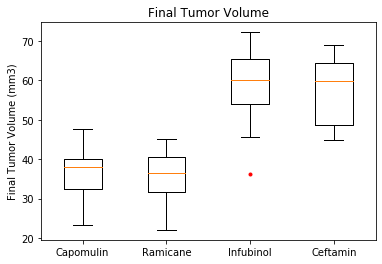

In [179]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest+
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(x=(final_tumor_Capomulin_df["Tumor Volume (mm3)"],final_tumor_Ramicane_df["Tumor Volume (mm3)"],
               final_tumor_Infubinol_df["Tumor Volume (mm3)"],final_tumor_Ceftamin_df["Tumor Volume (mm3)"],
               ), sym="r.")

ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()
37

## Line and scatter plots

C:\Users\oddoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


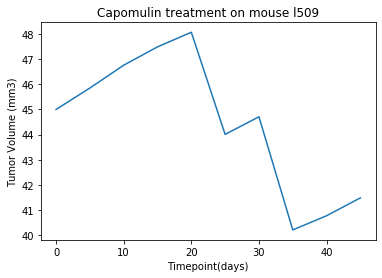

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


In [238]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
m_l509=mouse_study[mouse_study["Mouse ID"]=="l509"][mouse_study["Drug Regimen"]=="Capomulin"]
plt.plot(mouse_study[mouse_study["Mouse ID"]=="l509"]["Timepoint"],mouse_study[mouse_study["Mouse ID"]=="l509"]
        ["Tumor Volume (mm3)"])
plt.title("Capomulin treatment on mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
m_l509

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

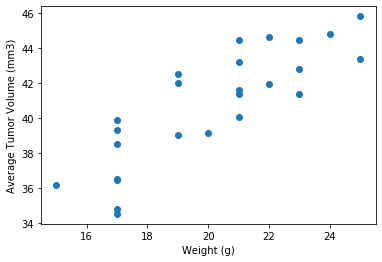

In [279]:
campomulin=mouse_study[mouse_study["Drug Regimen"]=="Capomulin"]
campomulin_average=campomulin.groupby("Mouse ID").mean()
plt.scatter(campomulin_average["Weight (g)"],y=campomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [275]:
(campomulin[campomulin["Mouse ID"]=="b128"]["Tumor Volume (mm3)"]).sum()/10

41.963635634

In [260]:
campomulin_average.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


The correlation between mouse weight and the average tumor volume is 0.84


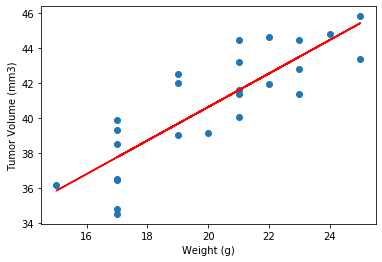

In [318]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(campomulin_average["Weight (g)"],campomulin_average["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
figure=st.linregress(campomulin_average["Weight (g)"],campomulin_average["Tumor Volume (mm3)"])
y_values= campomulin_average["Weight (g)"]*figure[0]+figure[1]
plt.scatter(campomulin_average["Weight (g)"],campomulin_average["Tumor Volume (mm3)"])
plt.plot(campomulin_average["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()